In [247]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile
import numpy as np
from IPython.display import display, Image
import matplotlib.image as mpimg
from urllib.request import urlopen
from io import BytesIO

In [166]:
print(os.listdir())

['.conda', '.git', '.gitattributes', '.gitignore', '1 LEGO_Datasets.ipynb', 'colors.csv', 'colors.csv.gz', 'demo.py', 'downloads_schema.png', 'extracted_parts', 'inventories.csv', 'inventories.csv.gz', 'inventory_parts.csv', 'inventory_parts.csv.gz', 'inventory_sets.csv', 'LICENSE.txt', 'markdown-diff', 'parts.csv', 'part_categories.csv', 'README.md', 'sets.csv', 'sets.csv.gz', 'SpeckledBlackGold', 'themes.csv', 'unassigned_names.txt']


## Creating the Panda dataframes

In [167]:
colors = pd.read_csv("colors.csv.gz", compression='gzip', dtype={'name': 'str', 'rgb': 'str'})
inventories = pd.read_csv("inventories.csv.gz", compression='gzip')
inventory_parts = pd.read_csv("inventory_parts.csv.gz", compression='gzip')
sets = pd.read_csv("sets.csv.gz")



# LEGO color exploration


## This notebook explores the following:

* The most common lego colors of all time (1950 to 2017)
* How the colors included in sets have changed over time
* How the size of sets have changed over time

## Other ideas for this data set

* Track popular themes and by year
* What colors are associated with which themes? 
* Could you predict which theme a set is from just by the bricks it contains?
* What sets have the most-used pieces in them? What sets have the rarest pieces in them?

## Grouping the 135 indexed colors into 14 groups for simplified graphing and cleaning up the color names

In [168]:
# Determine the number of rows in the colors index DataFrame
num_rows = colors.shape[0]
# Print the number of rows
print(f"The number of rows in the colors (index) DataFrame is {num_rows}.")

The number of rows in the colors (index) DataFrame is 267.


In [169]:
# Remove extraneous quotes
# Use the str.replace() method to remove the quotes, brackets, leading dashes from the name column

colors['name'] = colors['name'].str.replace(r'^["\']|["\']$', '', regex=True)
# regex=True: This argument is used to specify that the pattern is a regular expression.
# r'^["\']|["\']$': This is a regular expression pattern used to match specific characters at the beginning or end of the string.
# The ^ symbol matches the start of the string, and the $ symbol matches the end of the string.
# The pattern ["\'] matches either a single or double quote character.
# The | symbol is a logical OR operator that matches either the pattern before or after it.
# The regex pattern ^["\'] matches a single or double quote character at the beginning of the string.
# The regex pattern ["\']$ matches a single or double quote character at the end of the string.

# Remove leading dashes
# r "'-": This regular expression pattern matches a single quote followed by a dash character.
colors['name'] = colors['name'].str.replace(r"'-", '', regex=True)

colors['name'] = colors['name'].str.replace(r'[\[\]]', '', regex=True) #remove brackets
# Strip leading/trailing spaces
colors['name'] = colors['name'].str.strip()
# Replace 'f' with False and 't' with True
colors['is_trans'] = colors['is_trans'].replace({'f': False, 't': True})
# Define the mapping of color names to groups
color_groups = {
    'Red': 'Red',
    'Green': 'Green',
    'Blue': 'Blue',
    'Light Blue': 'Blue',
    'Dark Green': 'Green',
    'Medium Lavender': 'Purple',
    'Yellow': 'Yellow',
    'Orange': 'Orange',
    'Pink': 'Pink',
    'Unknown': 'Unknown\nWild Card',
    'Black': 'Black',
    'Dark Turquoise': 'Blue',
    'Medium Blue': 'Blue',
    'Tan': 'Brown',
    'Light Gray': 'Gray',
    'Dark Gray': 'Gray',
    'Brown': 'Brown',
    'White': 'White',
    'Purple': 'Purple',
    'Lime': 'Green',
    'Magenta': 'Pink',
    'Dark Pink': 'Pink',
    'Light Pink': 'Pink',
    'Bright Pink': 'Pink',
    'Lavender': 'Purple',
    'Sand Blue': 'Blue',
    'Sand Green': 'Green',
    'Sand Purple': 'Purple',
    'Sand Red': 'Red',
    'Sand Yellow': 'Yellow',
    'Dark Red': 'Red',
    'Medium Dark Pink': 'Pink',
    'Dark Brown': 'Brown',
    'Medium Azure': 'Blue',
    'Medium Blue': 'Blue',
    'Medium Green': 'Green',
    'Medium Lime': 'Green',
    'Medium Orange': 'Orange',
    'Medium Red': 'Red',
    'Medium Violet': 'Purple',
    'Medium Yellow': 'Yellow',
    'Bright Light Blue': 'Blue',
    'Bright Light Orange': 'Orange',
    'Bright Light Yellow': 'Yellow',
    'Bright Purple': 'Purple',
    'Bright Red': 'Red',
    'Bright Yellow': 'Yellow',
    'Light Aqua': 'Blue',
    'Light Green': 'Green',
    'Light Lime': 'Green',
    'Light Orange': 'Orange',
    'Light Purple': 'Purple',
    'Light Salmon': 'Red',
    'Light Turquoise': 'Blue',
    'Light Yellow': 'Yellow',
    'Olive Green': 'Green',
    'Very Light Bluish Gray': 'Gray',
    'Very Light Gray': 'Gray',
    'Very Light Orange': 'Orange',
    'Very Light Yellow': 'Yellow',
    'Dark Blue-Violet': 'Blue',
    'Dark Blue': 'Blue',
    'Dark Azure': 'Blue',
    'Dark Orange': 'Orange',
    'Dark Tan': 'Brown',
    'Dark Purple': 'Purple',
    'Dark Flesh': 'Brown',
    'Dark Salmon': 'Red',
    'Dark Yellow': 'Yellow',
    'Light Blue-Violet': 'Blue',
    'Light Bluish Gray': 'Gray',
    'Light Grayish Blue': 'Gray',
    'Light Grayish Orange': 'Orange',
    'Light Nougat': 'Brown',
    'Light Purple': 'Purple',
    'Light Salmon': 'Red',
    'Light Yellowish Orange': 'Yellow',
    'Medium Blue-Violet': 'Blue',
    'Medium Bluish Gray': 'Gray',
    'Medium Dark Flesh': 'Brown',
    'Medium Dark Pink': 'Pink',
    'Medium Lavender': 'Purple',
    'Medium Nougat': 'Brown',
    'Medium Purple': 'Purple',
    'Medium Reddish Brown': 'Brown',
    'Medium Violet': 'Purple',
    'Medium Yellowish Orange': 'Yellow',
    'Bright Bluish Green': 'Green',
    'Bright Bluish Violet': 'Blue',
    'Bright Green': 'Green',
    'Bright Orange': 'Orange',
    'Bright Purple': 'Purple',
    'Bright Reddish Violet': 'Red',
    'Bright Violet': 'Purple',
    'Bright Yellowish Green': 'Yellow',
    'Light Bluish Green': 'Green',
    'Light Bluish Violet': 'Blue',
    'Light Bright Blue': 'Blue',
    'Light Bright Green': 'Green',
    'Light Brown': 'Brown',
    'Trans-Yellow': 'Yellow',
    'Trans-Black IR Lens': 'Black',
    'Light': 'White',
    'Salmon': 'Red',
    'Light Violet': 'Purple',
    'Glow In Dark Opaque': 'White',
    'Dark Violet' : 'Purple',
    'Trans Flame Yellowish Orange': 'Orange',
    'Trans Fire Yellow': 'Yellow',
    'Trans Light Royal' : 'Blue',
    'Reddish Lilac': 'Purple',
    'No Color' : 'Black',
    'Trans-Dark': 'Black',
    'Trans-Green': 'Green',
    'Trans-Bright Green': 'Green',
    'Trans-Red': 'Red',
    'Trans-Black': 'Black',
    'Chrome Gold': 'Metallic',
    'Chrome Antique Brass': 'Metallic',
    'Chrome Black': 'Metallic',
    'Chrome Blue': 'Metallic',
    'Chrome Green': 'Metallic',
    'Chrome Pink': 'Metallic',
    'Chrome Silver': 'Metallic',
    'Fabuland Brown': 'Brown',
    'Glow in Dark White': 'White',
    'Trans-Light' : 'Clear',
    'Trans-Neon Green': 'Green',
    'Trans-Very Lt': 'Clear',
    'Trans-Dark Pink': 'Pink',
    'Trans-Clear': 'Clear',
    'Trans-Purple': 'Purple',
    'Trans-Neon Orange': 'Orange',
    'Chrome' : 'Metallic',
    'Reddish Brown': 'Brown',
    'Trans-Neon Yellow': 'Yellow',
    'Dark Bluish Gray': 'Gray',
    'Medium': 'Unknown\nWild Card',
    'Speckle Black-Copper': 'Metallic',
    'Speckle DBGray-Silver': 'Metallic',
    'Light Flesh': 'Pink',
    'Milky White': 'White',
    'Metallic Silver': 'Metallic',
    'Metallic Gold': 'Metallic',
    'Metallic Green': 'Metallic',
    'Metallic Gold' : 'Metallic',
    'Royal': 'Blue',
    'Flesh': 'Pink',
    'Violet': 'Purple',
    '-Violet': 'Purple',
    'Glitter Trans-Dark Pink': 'Pink',
    'Glitter Trans-Clear': 'Clear',
    'Aqua': 'Blue',
    'Glitter Trans-Purple': 'Purple',
    'Speckle Black-Silver': 'Metallic',
    'Speckle Black-Gold': 'Metallic',
    'Copper': 'Metallic',
    'Pearl Light Gray': 'Gray',
    'Metal': 'Metallic',
    'Pearl Light Gold': 'Metallic',
    'Trans-Medium': 'Unknown\nWild Card', 
    'Pearl Dark Gray': 'Gray',
    'Pearl Very Light Gray': 'Gray',
    'Flat Silver': 'Metallic',
    'Trans-Orange': 'Orange',
    'Pearl White': 'White',
    'Bright Light': 'White',
    'Rust': 'Brown',
    'Trans-Pink': 'Pink',
    'Sky': 'Blue',
    'Trans-Light Purple': 'Purple',
    'Dark': 'Unknown\nWild Card',
    'Glow In Dark Trans': 'Clear',
    'Pearl Gold': 'Metallic',
    'Maersk': 'Blue',
    'Earth Orange': 'Orange',
    'Sand': 'Yellow',
    'Glitter Trans-Light': 'Clear',
    'Yellowish Green': 'Green',
    'Flat Dark Gold': 'Metallic',
    'Glitter Trans-Neon Green': 'Green',
    'Trans-Dark Blue': 'Blue',
    'Trans-Brown': 'Brown',
    'Trans-Very Lt Blue': 'Blue',
    'Royal Blue': 'Blue',
    'Reddish Orange': 'Orange',
    'Sienna Brown': 'Brown',
    'Umber Brown': 'Brown',
    'Opal Trans-Yellow': 'Yellow',
    'No Color/Any Color': 'Unknown\nWild Card',
    'Nougat': 'Brown',
    'Medium Bluish Violet': 'Blue',
    'Trans-Light Blue': 'Blue',
    'Pearl Sand Blue': 'Blue',
    'Trans-Medium Blue': 'Blue',
    'Sky Blue': 'Blue',
    'Maersk Blue': 'Blue',
    'Glitter Trans-Light Blue': 'Blue',
    'Trans-Flame Yellowish Orange': 'Orange',
    'Trans-Fire Yellow': 'Yellow',
    'Trans-Light Royal Blue' : 'Blue',
    'Vintage Blue': 'Blue',
    'Vintage Green': 'Green',
    'Vintage Red': 'Red',
    'Vintage Yellow': 'Yellow',
    'Fabuland Orange': 'Orange',
    'Modulex White': 'White',
    'Modulex Light Gray': 'Gray',
    'Modulex Charcoal Gray': 'Gray',
    'Modulex Tile Gray': 'Gray',
    'Modulex Black': 'Black',
    'Modulex Dark Gray': 'Gray',
    'Modulex Tile Brown': 'Brown',
    'Modulex Terracotta': 'Brown',
    'Modulex Brown': 'Brown',
    'Modulex Buff': 'Brown',
    'Modulex Red': 'Red',
    'Modulex Pink Red': 'Pink',
    'Modulex Orange': 'Orange',
    'Modulex Light Orange': 'Orange',
    'Modulex Light Yellow': 'Yellow',
    'Modulex Ochre Yellow': 'Yellow',
    'Modulex Lemon': 'Yellow',
    'Modulex Pastel Green': 'Green',
    'Modulex Olive Green': 'Green',
    'Modulex Aqua Green': 'Green',
    'Modulex Teal Blue': 'Blue',
    'Modulex Tile Blue': 'Blue',
    'Modulex Medium Blue': 'Blue',
    'Modulex Pastel Blue': 'Blue',
    'Modulex Violet': 'Purple',
    'Modulex Pink': 'Pink',
    'Modulex Clear': 'Clear',
    'Modulex Foil Dark Gray': 'Gray',
    'Modulex Foil Light Gray': 'Gray',
    'Modulex Foil Dark Green': 'Green',
    'Modulex Foil Light Green': 'Green',
    'Modulex Foil Dark Blue': 'Blue',   
    'Modulex Foil Light Blue': 'Blue',
    'Modulex Foil Violet': 'Purple',
    'Modulex Foil Red': 'Red',
    'Modulex Foil Yellow': 'Yellow',
    'Modulex Foil Orange': 'Orange',
    'Coral': 'Orange',
    'Pastel Blue': 'Blue',
    'Glitter Trans-Orange': 'Orange',
    'Opal Trans-Light Blue': 'Blue',
    'Opal Trans-Dark Pink': 'Pink',
    'Opal Trans-Clear': 'Clear',
    'Opal Trans-Brown': 'Brown',
    'Trans-Light Bright Green': 'Green',
    'Trans-Light Green:': 'Green',
    'Opal Trans-Purple': 'Purple',
    'Opal Trans-Bright Green'
    'Opal Trans-Dark Blue': 'Blue',
    'Vibrant Yellow': 'Yellow',
    'Pearl Copper': 'Metallic',
    'Fabuland Red': 'Red',
    'Reddish Gold': 'Metallic',
    'Curry': 'Orange',
    'Dark Nougat': 'Brown',
    'Bright Reddish Orange': 'Orange',
    'Pearl Red': 'Red',
    'Pearl Blue': 'Blue',
    'Pearl Green': 'Green',
    'Pearl Brown': 'Brown',
    'Pearl Black': 'Black',
    'Duplo Blue': 'Blue',
    'Duplo Medium Blue': 'Blue',
    'Duplo Lime': 'Green',
    'Fabuland Lime': 'Green',
    'Duplo Medium Green': 'Green',
    'Duplo Light Green': 'Green',
    'Light Tan': 'Brown',
    'Rust Orange': 'Orange',
    'Clikits Pink': 'Pink',
    'Two-tone Copper': 'Metallic',
    'Two-tone Gold': 'Metallic',
    'Two-tone Silver': 'Metallic',
    'Pearl Lime': 'Green',
    'Duplo Pink': 'Pink',
    'Medium Brown': 'Brown',
    'Warm Tan': 'Brown',
    'Duplo Turquoise': 'Blue',
    'Warm Yellowish Orange': 'Orange',
    'Metallic Copper': 'Metallic',
    'Light Lilac': 'Purple',
    'Trans-Medium Purple': 'Purple',
    'Glitter Trans-Bright Green': 'Green',
    'Glitter Trans-Medium Purple': 'Purple',
    'Glitter Trans-Green': 'Green',
    'Glitter Trans-Pink': 'Pink',
    'Clikits Yellow': 'Yellow',
    'Duplo Dark Purple': 'Purple',
    'Trans-Neon Red': 'Red',
    'Pearl Titanium': 'Metallic',
    'Modulex Light Bluish Gray': 'Gray',
    'Trans-Light Green': 'Green',
    'Opal Trans-Bright Green': 'Green',
    'Opal Trans-Dark Blue': 'Blue',
    'HO Aqua': 'Blue',
    'HO Azure': 'Blue',
    'HO Blue-gray': 'Blue',
    'HO Cyan': 'Blue',
    'HO Dark Aqua': 'Blue',
    'HO Dark Blue': 'Blue',
    'HO Dark Gray': 'Gray',
    'HO Dark Green': 'Green',
    'HO Dark Lime': 'Green',
    'HO Dark Red': 'Red',
    'HO Dark Sand Green': 'Green',
    'HO Dark Turquoise': 'Blue',
    'HO Earth Orange': 'Orange',
    'HO Gold': 'Metallic',
    'HO Light Aqua': 'Blue',
    'HO Light Brown': 'Brown',
    'HO Light Gold': 'Metallic',
    'HO Light Tan': 'Brown',
    'HO Light Yellow': 'Yellow',
    'HO Medium Blue': 'Blue',
    'HO Medium Red': 'Red',
    'HO Metallic Blue': 'Metallic',
    'HO Metallic Dark Gray': 'Metallic',
    'HO Metallic Green': 'Metallic',
    'HO Metallic Sand Blue': 'Metallic',
    'HO Olive Green': 'Green',
    'HO Rose': 'Pink',
    'HO Sand Blue': 'Blue',
    'HO Sand Green' : 'Green',
    'HO Tan': 'Brown',
    'HO Titanium': 'Metallic',

}

# Apply the mapping to create a new column 'color_group'
colors['color_group'] = colors['name'].map(color_groups)

# Check for unassigned names
unassigned_names = colors[colors['color_group'].isna()][['name']]

# Count how many have group as NaN
na_count = unassigned_names.shape[0]
print(f"Number of unassigned names : {na_count}")
print()

# Display unassigned names
if not unassigned_names.empty:
    print("Unassigned color names:")
    print(unassigned_names)
else:
    print("All color names have been assigned to a group.")


Number of unassigned names : 0

All color names have been assigned to a group.


### Writing all unassigned color names to a file

In [170]:
# Save the unassigned names to a file for easy reference
unassigned_names.to_csv('unassigned_names.txt', index=False, sep='\t')

print("Unassigned names have been saved to 'unassigned_names.txt'.")

Unassigned names have been saved to 'unassigned_names.txt'.


### Verify that the number of color groups is a manageable number for data visualizations

In [171]:
# Count the number of unique names
unique_groups_count = colors['color_group'].nunique()

# Display the count of unique names
print(f"There are now {unique_groups_count} color groups")

print(colors.head())

There are now 14 color groups
   id            name     rgb  is_trans         color_group
0  -1         Unknown  0033B2     False  Unknown\nWild Card
1   0           Black  05131D     False               Black
2   1            Blue  0055BF     False                Blue
3   2           Green  237841     False               Green
4   3  Dark Turquoise  008F9B     False                Blue


## Adding Columns for Special Features: Translucent, Glow-in-the-Dark, Glitter

In [172]:
# Add a boolean column named Glitter to the colors DataFrame
colors['glitter'] = colors['name'].str.contains('glitter', case=False, na=False)
# Count the number of rows that contain True for the column Glitter
num_glitter_true = colors['glitter'].sum()


# Add a boolean column named Glow to the colors DataFrame
colors['glow'] = colors['name'].str.contains('glow', case=False, na=False)
# Count the number of rows that contain True for the column Glitter
num_glow_true = colors['glow'].sum()

# Count the number of rows that contain True for the column is_trans
num_is_trans_true = colors['is_trans'].sum()

# Display the counts
print(f"The number of rows in the color (index) df that contain:")
print(f"True for the column 'glitter': {num_glitter_true}.")
print(f"True for the column 'glow': {num_glow_true}.")
print(f"True for the column 'is_trans': {num_is_trans_true}.")


The number of rows in the color (index) df that contain:
True for the column 'glitter': 10.
True for the column 'glow': 3.
True for the column 'is_trans': 45.


## Merge the data frames colors, inventory_parts, inventories and sets so that colors can be tracked by year

In [173]:
# Merge inventory_parts with colors to get the color names
inventory_parts_colors = inventory_parts.merge(colors, left_on='color_id', right_on='id')

# Merge inventory_parts_colors with inventories to get the set_num
inventory_parts_colors = inventory_parts_colors.merge(inventories, left_on='inventory_id', right_on='id')

# Merge the resulting DataFrame with sets to get the set details
merged_df = inventory_parts_colors.merge(sets, left_on='set_num', right_on='set_num')

# Rename the column img_url_x to img_url_part
merged_df = merged_df.rename(columns={'img_url_x': 'img_url_part'})
# Rename the column img_url_y to img_url_set
merged_df = merged_df.rename(columns={'img_url_y': 'img_url_set'})
# Rename the column name_x to color_name and name_y to set_name
merged_df = merged_df.rename(columns={'name_x': 'color_name', 'name_y': 'set_name'})

# Inspect the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())
print()
print("Merged DataFrame Columns:")
print(merged_df.columns)

Merged DataFrame:
   inventory_id        part_num  color_id  quantity  is_spare  \
0             1        48379c04        72         1     False   
1             1           48391         0         1     False   
2             1           48395         7         1     False   
3             1        48864c01        25         1     False   
4             1  stickerupn0077      9999         1     False   

                                        img_url_part  id_x  \
0  https://cdn.rebrickable.com/media/parts/photos...    72   
1  https://cdn.rebrickable.com/media/parts/photos...     0   
2  https://cdn.rebrickable.com/media/parts/photos...     7   
3                                                NaN    25   
4                                                NaN  9999   

           color_name     rgb  is_trans  ... glitter   glow  id_y  version  \
0    Dark Bluish Gray  6C6E68     False  ...   False  False     1        1   
1               Black  05131D     False  ...   False  False   

### We used color_id and id_x (id_x is id from color.csv) as the common key for merging, and therefore they are duplicates.  Inventory_id and id_y (id_y is id from inventories.csv) are duplicates in the same way.  Therefore, let's remove columns id_x and id_y.

In [174]:
# Check if id_x is the same as inventory_id
all_equal = (merged_df['id_x'] == merged_df['color_id']).all()
print(f"Do id_x and inventory_id always equal each other? {all_equal}")
# Check if id_y is the same as inventory_id
all_equal = (merged_df['id_y'] == merged_df['inventory_id']).all()
print(f"Do id_y and inventory_id always equal each other? {all_equal}")

# Drop the id_x and id_y columns
merged_df = merged_df.drop(columns=['id_x', 'id_y'])

Do id_x and inventory_id always equal each other? True
Do id_y and inventory_id always equal each other? True


### Checking for missing values in the merged_df.  The img_url_part is not critical, so we are moving on.

In [175]:
# Print the number of missing values in each column
missing_values = merged_df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url_part    6900
color_name         0
rgb                0
is_trans           0
color_group        0
glitter            0
glow               0
version            0
set_num            0
set_name           0
year               0
theme_id           0
num_parts          0
img_url_set        0
dtype: int64


## Determining the range of years in the merged data frame

In [176]:
# Determine the range of years in the merged_df DataFrame
min_year = merged_df['year'].min()
max_year = merged_df['year'].max()

# Print the range of years
print(f"The data in the merged_df DataFrame is from {min_year} to {max_year}.")

The data in the merged_df DataFrame is from 1949 to 2025.


### The data from 2025 is not complete, so let's drop it.

In [177]:
# Drop rows where the year is 2025
merged_df = merged_df[merged_df['year'] != 2025]

# Print the DataFrame to verify the rows have been dropped
print(merged_df)

         inventory_id        part_num  color_id  quantity  is_spare  \
0                   1        48379c04        72         1     False   
1                   1           48391         0         1     False   
2                   1           48395         7         1     False   
3                   1        48864c01        25         1     False   
4                   1  stickerupn0077      9999         1     False   
...               ...             ...       ...       ...       ...   
1229093        150162           32565      1085         1     False   
1229094        150162           32566      1085         1     False   
1229095        150162           32568      1085         1     False   
1229096        150162           32569      1085         1     False   
1229097        150162           32571      1085         1     False   

                                              img_url_part  \
0        https://cdn.rebrickable.com/media/parts/photos...   
1        https://cdn.re

## The top 10 colored pieces of all time (1949 to 2024)

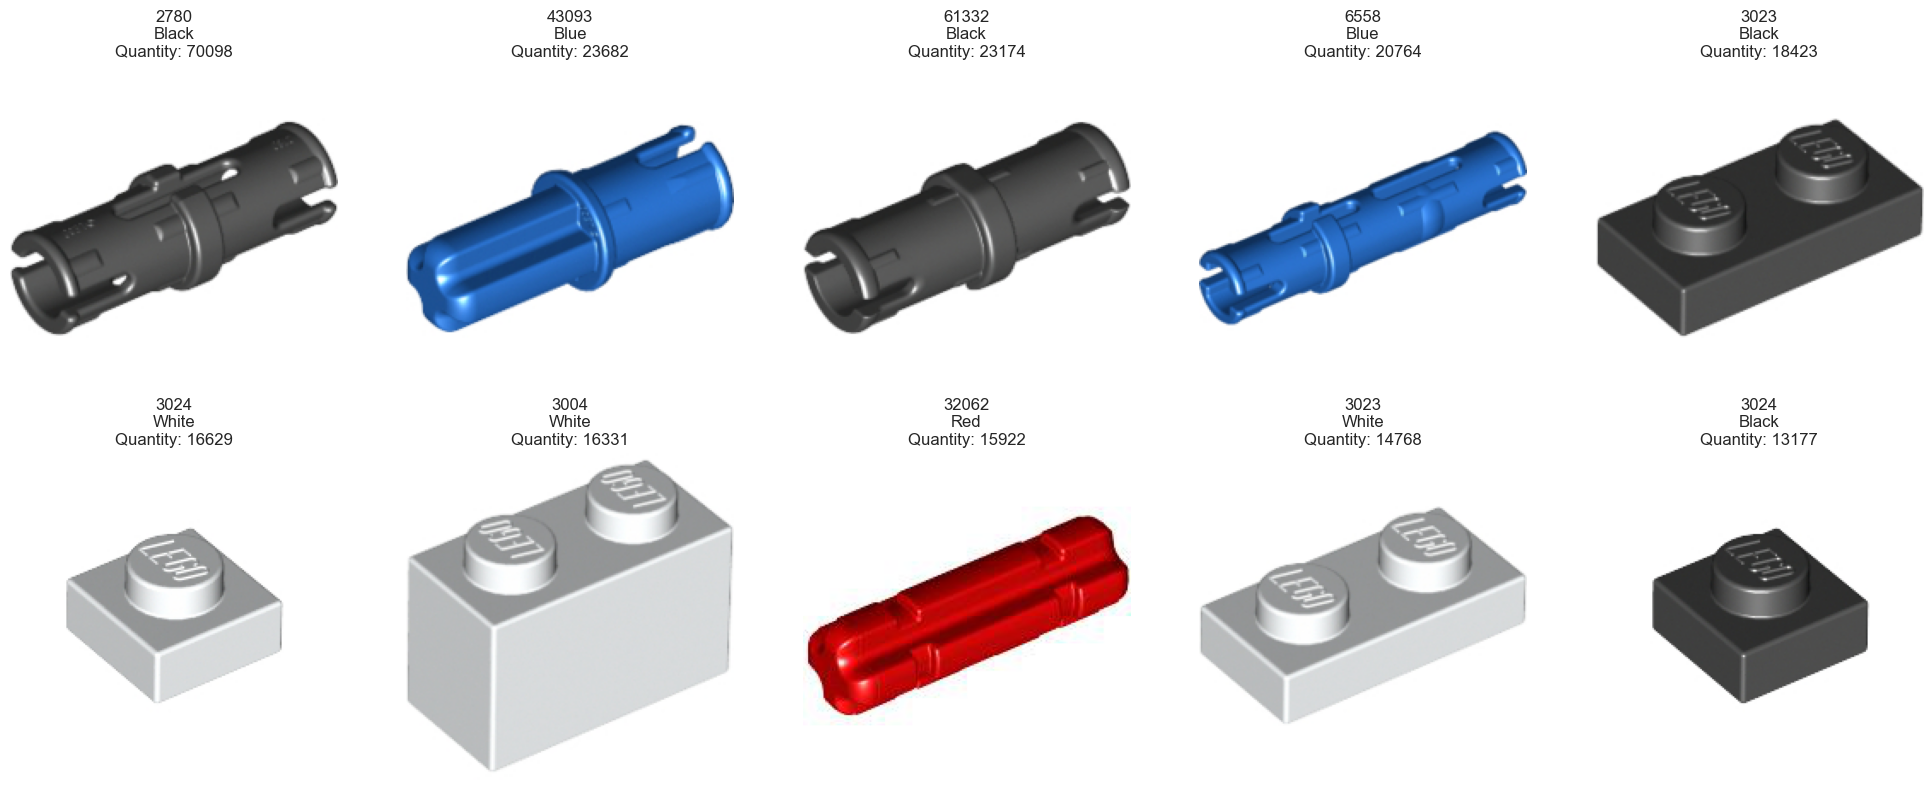

In [248]:
# Pivot the DataFrame
pivot_df = merged_df.pivot_table(index=['part_num', 'color_name'], values=['quantity', 'img_url_part'], aggfunc={'quantity': 'sum', 'img_url_part': 'first'})

# Filter the DataFrame to include only records with img_url_part
filtered_df = pivot_df.dropna(subset=['img_url_part'])

# Sort the DataFrame by quantities in descending order
sorted_df = filtered_df.sort_values(by='quantity', ascending=False)

# Display the first 10 highest quantities along with the URL in a grid
top_10 = sorted_df.head(10)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for ax, (key, value) in zip(axes.flatten(), top_10.iterrows()):
    part_num, color_name = key
    quantity = value['quantity']
    img_url = value['img_url_part']
    
    # Load the image from the URL
    try:
        img = mpimg.imread(BytesIO(urlopen(img_url).read()), format='jpg')
        ax.imshow(img)
        ax.set_title(f"{part_num}\n{color_name}\nQuantity: {quantity}")
        ax.axis('off')
    except Exception as e:
        print(f"Could not load image for {part_num} {color_name}: {e}")
        ax.axis('off')

plt.tight_layout()
plt.show()

## Glitter, Glow, and Transparent Pieces

There are 71500 translucent pieces.
There are 279 glitter pieces.
There are 383 glow-in-the-dark pieces.


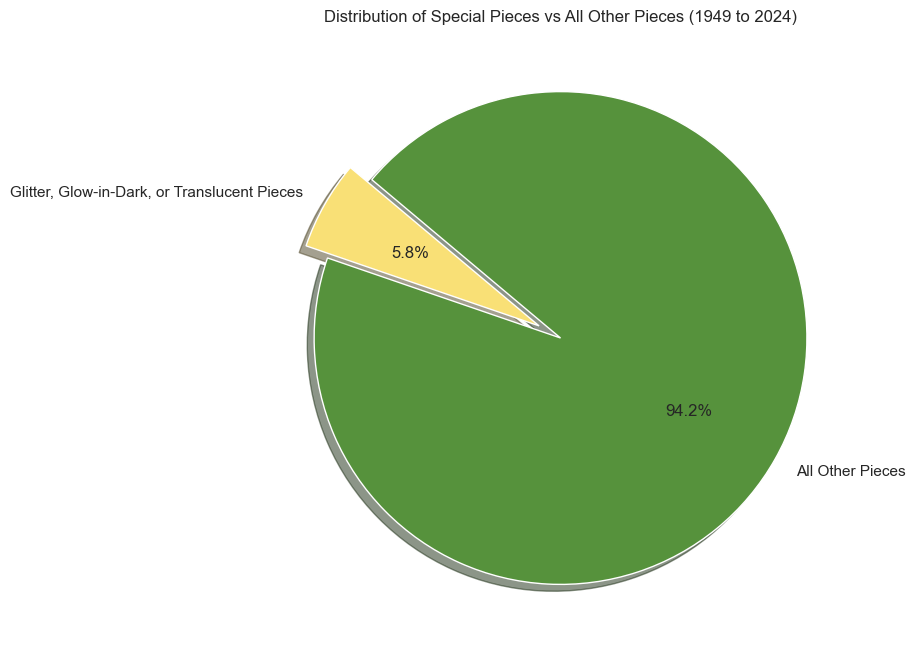

In [246]:
# Count the number of True values for each column
num_is_trans_true = merged_df['is_trans'].sum()
num_glitter_true = merged_df['glitter'].sum()
num_glow_true = merged_df['glow'].sum()

# Display the results
print(f"There are {num_is_trans_true} translucent pieces.")
print(f"There are {num_glitter_true} glitter pieces.")
print(f"There are {num_glow_true} glow-in-the-dark pieces.")

# Filter the DataFrame for pieces with glitter, glow, or is_trans
special_pieces = merged_df[(merged_df['is_trans']) | (merged_df['glitter']) | (merged_df['glow'])]

# Count the number of special pieces and other pieces
num_special_pieces = special_pieces.shape[0]
num_other_pieces = merged_df.shape[0] - num_special_pieces

# Create a pie chart
labels = ['Glitter, Glow-in-Dark, or Translucent Pieces', 'All Other Pieces']
sizes = [num_special_pieces, num_other_pieces]
colors = ['#F9E076', '#56923C']
explode = (0.1, 0)  # explode the first slice

# Apply Seaborn aesthetics
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Special Pieces vs All Other Pieces (1949 to 2024)')
plt.show()

## Number of unique color_names each year

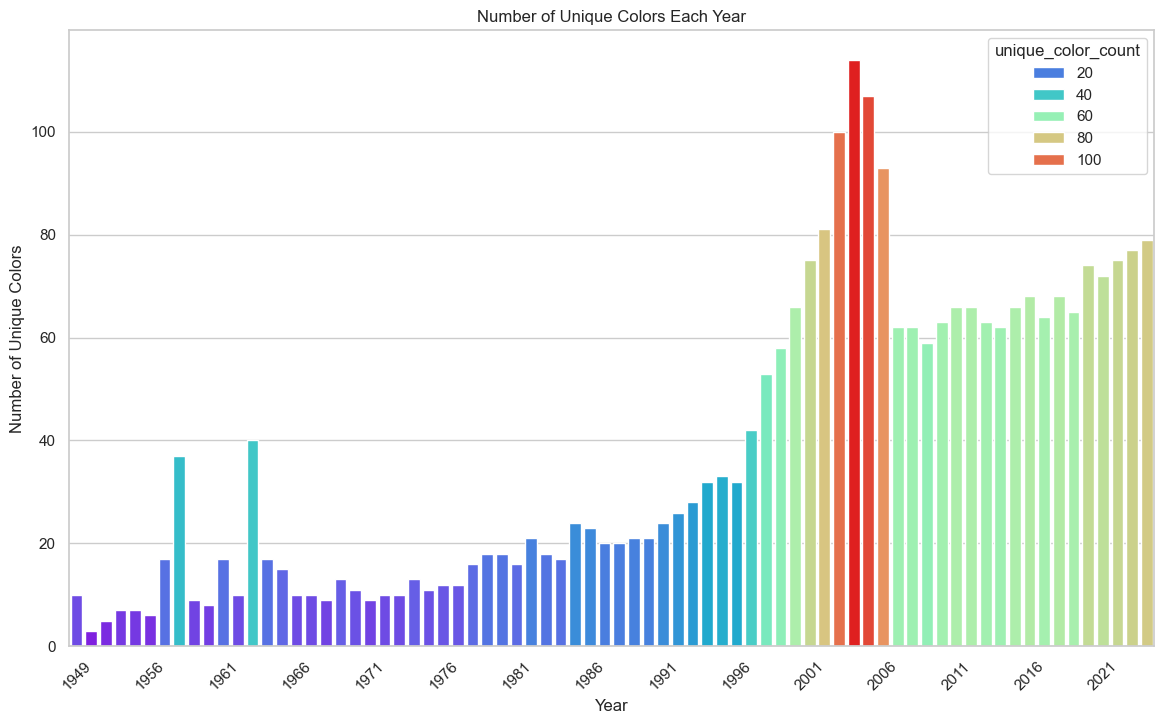

In [213]:
# Group the data by year and count the unique color_names
color_counts_per_year = merged_df.groupby('year')['color_name'].nunique().reset_index()
color_counts_per_year.columns = ['year', 'unique_color_count']

# Create the bar chart using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(data=color_counts_per_year, x='year', y='unique_color_count', hue='unique_color_count',  palette='rainbow')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Unique Colors')
plt.title('Number of Unique Colors Each Year')

import numpy as np

# Customize the x-ticks to label every 5 years
plt.xticks(np.arange(0, len(color_counts_per_year), step=5), rotation=45)

# Show the bar chart
plt.show()

Around 2004 LEGO used feedback from focus groups and a company-wide restructuring to tighten up its color chart and fine-tune a few prominent colors. Most widely known (and much wailed about) were Light and Dark Grey, as well as Brown (what LEGO called Earth Orange) and a few other less common colors.

https://www.brothers-brick.com/2015/10/14/the-changing-palette-of-lego-1975-2014/#:~:text=Around%202004%20LEGO%20used%20feedback,few%20other%20less%20common%20colors.

## Color groups that were available each year

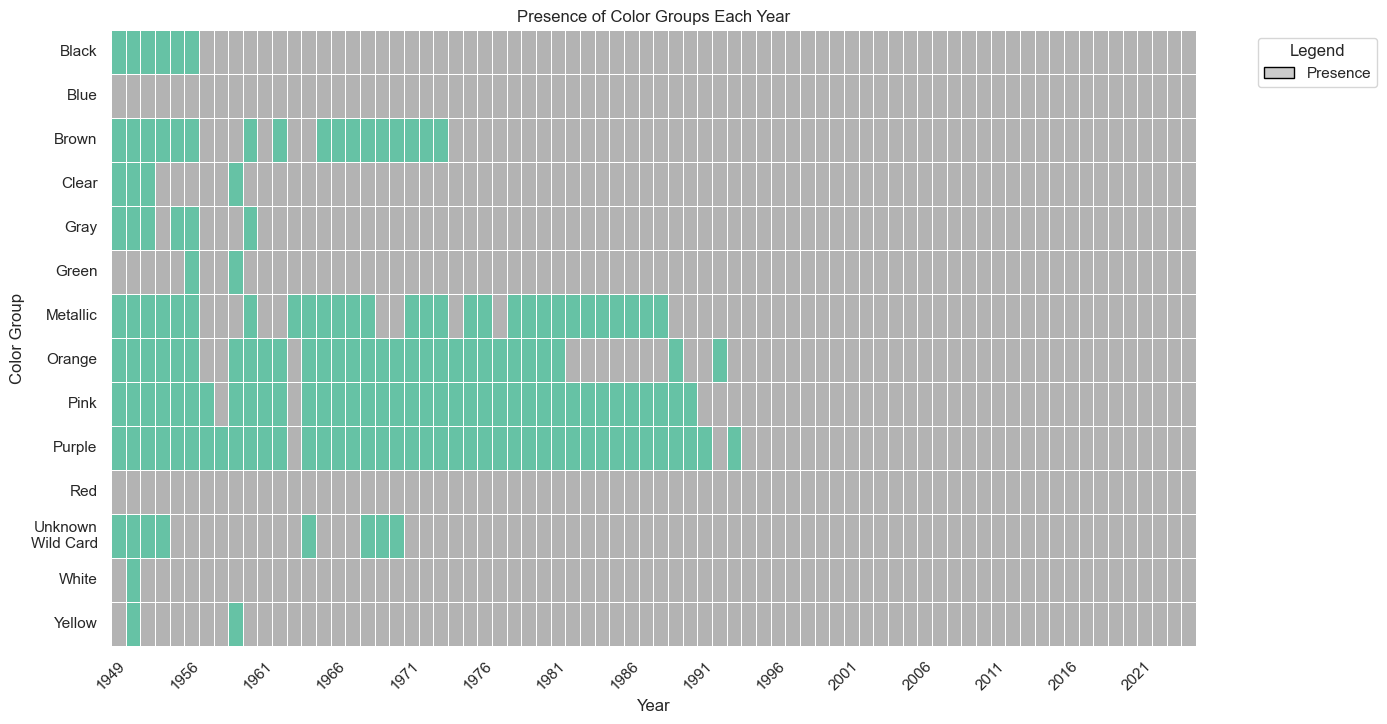

In [238]:
from matplotlib.patches import Patch

# Create a DataFrame to indicate the presence of each color_group each year
presence_df = merged_df.drop_duplicates(subset=['year', 'color_group']).copy()
presence_df.loc[:, 'presence'] = 1

# Pivot the DataFrame to get a wide format
pivot_df = presence_df.pivot(index='year', columns='color_group', values='presence').fillna(0)

# Create the heatmap using Seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df.T, cmap='Set2', cbar=False, linewidths=.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Color Group')
plt.title('Presence of Color Groups Each Year')

# Customize the x-ticks to label every 5 years
plt.xticks(ticks=range(0, len(pivot_df.index), 5), labels=pivot_df.index[::5], rotation=45)

# Add a custom legend
legend_elements = [Patch(facecolor='#CCCCCC', edgecolor='black', label='Presence')]
plt.legend(handles=legend_elements, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the heatmap
plt.show()

In [250]:
# Filter the DataFrame for the years 1949 and 2024
filtered_df = merged_df[merged_df['year'].isin([1949, 2024])]

# Retrieve the img_url_set column
img_url_sets_1949_2024 = filtered_df[['year', 'img_url_set']]

# Print the img_url_set for 1949 and 2024
print("img_url_set for 1949 and 2024:")
print(img_url_sets_1949_2024)

# Save the URLs to a file for easy reference
img_url_sets_1949_2024.to_csv('img_url_sets_1949_2024.txt', index=False, sep='\t')

print("URLs have been saved to 'img_url_sets_1949_2024.txt'.")

img_url_set for 1949 and 2024:
         year                                        img_url_set
816658   2024  https://cdn.rebrickable.com/media/sets/77050-1...
816659   2024  https://cdn.rebrickable.com/media/sets/77050-1...
816660   2024  https://cdn.rebrickable.com/media/sets/77050-1...
816661   2024  https://cdn.rebrickable.com/media/sets/77050-1...
816662   2024  https://cdn.rebrickable.com/media/sets/77050-1...
...       ...                                                ...
1228808  2024  https://cdn.rebrickable.com/media/sets/662402-...
1228809  2024  https://cdn.rebrickable.com/media/sets/552404-...
1228810  2024  https://cdn.rebrickable.com/media/sets/9788325...
1228811  2024  https://cdn.rebrickable.com/media/sets/9788325...
1228812  2024  https://cdn.rebrickable.com/media/sets/892411-...

[92535 rows x 2 columns]
URLs have been saved to 'img_url_sets_1949_2024.txt'.


## Total number of pieces in each color group from 1949 to 2024

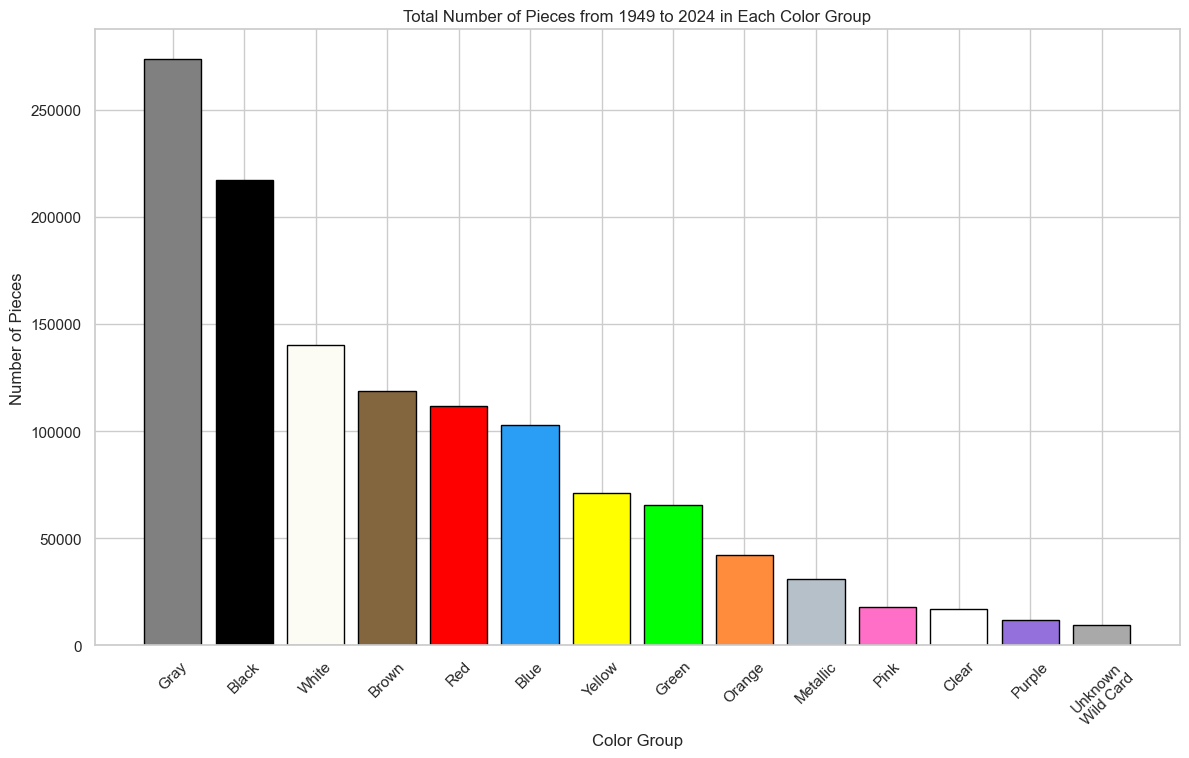

In [180]:
# Group the data by color group and sum the number of pieces
color_group_counts = merged_df['color_group'].value_counts()

# Define the color mapping for the bar colors
color_mapping = {
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFFF00',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#83653E',
    'Gray': '#808080',
    'White': '#FCFBF4',
    'Clear': '#FFFFFF',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9'
}

# Create a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(color_group_counts.index, color_group_counts.values, color=[color_mapping.get(color_group, '#A9A9A9') for color_group in color_group_counts.index], edgecolor='black')

# Add labels and title
plt.xlabel('Color Group')
plt.ylabel('Number of Pieces')
plt.title('Total Number of Pieces from 1949 to 2024 in Each Color Group')
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

## Changes in Color Groups from 1949 to 2024

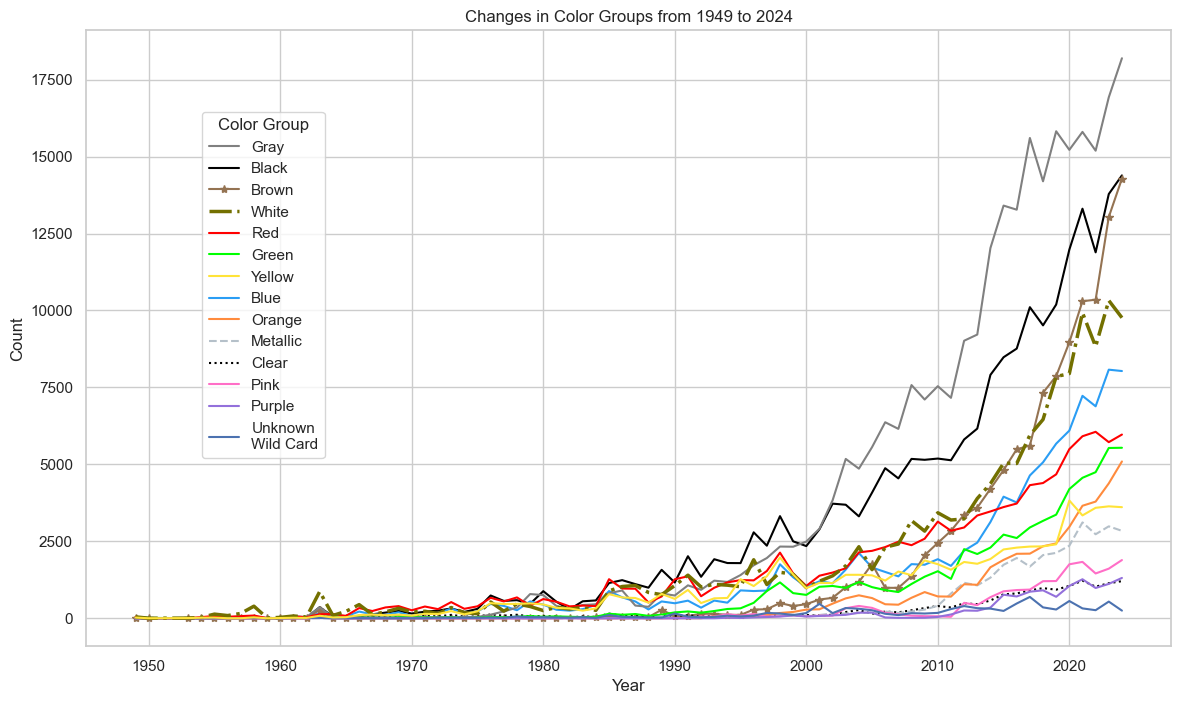

In [181]:
# Group the data by year and color group, and count the occurrences
color_group_counts = merged_df.groupby(['year', 'color_group']).size().unstack(fill_value=0)

# Define the color mapping for the LINES
color_mapping_lines = {
    
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFE338',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#947352',
    'Gray': '#808080',
    'White': '#737000',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#C0DFD3'
}

# Define the desired order of color groups in the legend
legend_order = ['Gray', 'Black', 'Brown', 'White', 'Red', 'Green', 'Yellow', 'Blue', 'Orange', 'Metallic', 'Clear', 'Pink', 'Purple', 'Unknown\nWild Card']

# Initialize the lines dictionary
lines = {}

# Plot the datagit commit -m "Update 1_LEGO_Datasets.ipynb with color group changes and bar chart"
plt.figure(figsize=(14, 8))
for color_group in color_group_counts.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='--')
    elif color_group == 'White':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='-.', linewidth=2.5)
    elif color_group == 'Clear':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle=':')
    elif color_group == 'Brown':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group), marker='*', linestyle="-")
    else:
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group))
    lines[color_group] = line

# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]
plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0.1, .88), loc='upper left')

plt.title('Changes in Color Groups from 1949 to 2024')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Pink, Purple, Orange Pieces

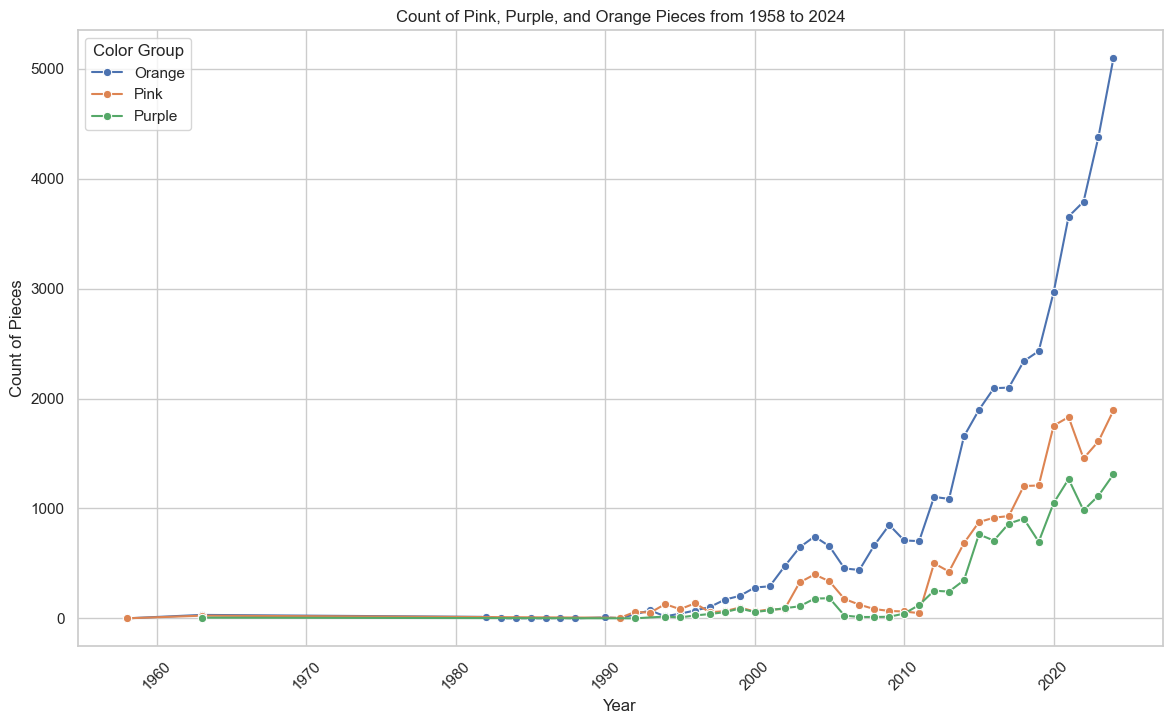

In [182]:
# Filter the data for the specified colors and years
filtered_df = merged_df[(merged_df['color_group'].isin(['Pink', 'Purple', 'Orange'])) & (merged_df['year'] >= 1958) & (merged_df['year'] <= 2024)]

# Group by year and color_group, and count the occurrences
grouped_df = filtered_df.groupby(['year', 'color_group']).size().reset_index(name='count')

# Create the line chart using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_df, x='year', y='count', hue='color_group', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Pieces')
plt.title('Count of Pink, Purple, and Orange Pieces from 1958 to 2024')
plt.legend(title='Color Group')
plt.xticks(rotation=45)

# Show the line chart
plt.show()

## Changes in Color Groups from 1949 to 1970

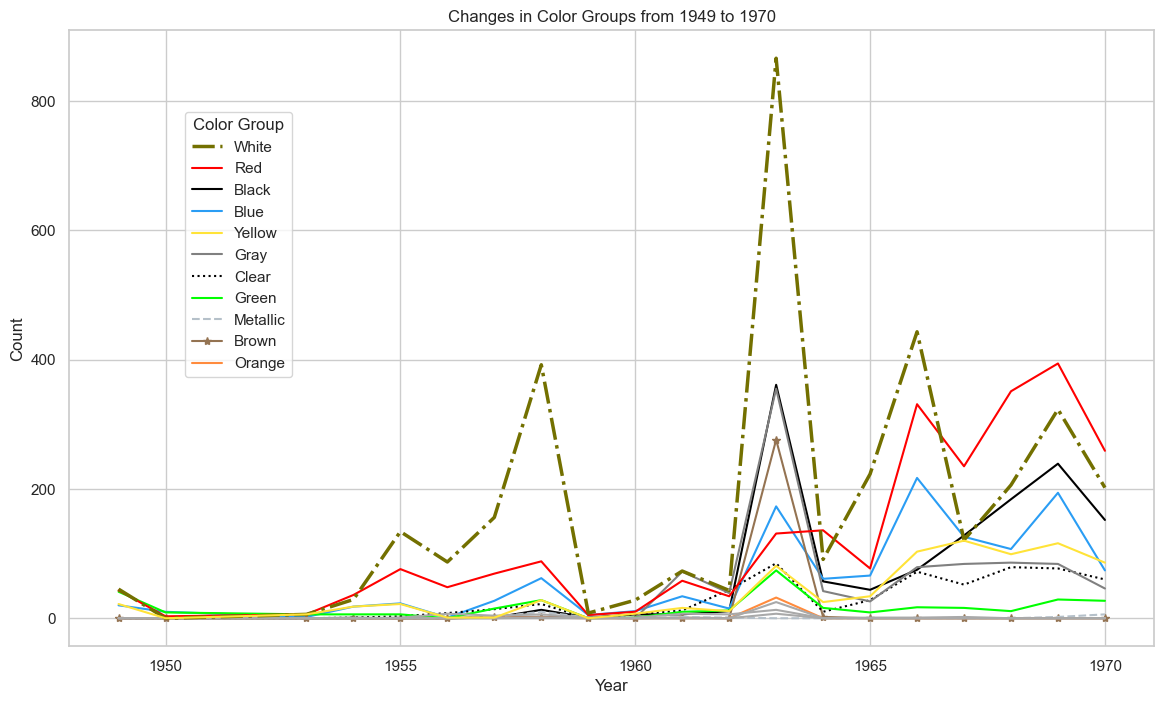

In [183]:
# Define the color mapping for the LINES
color_mapping_lines = {
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Yellow': '#FFE338',
    'Orange': '#FF8B3D',
    'Black': '#000000',
    'Brown': '#947352',
    'Gray': '#808080',
    'White': '#737000',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9'
}

# Define the desired order of color groups in the legend
legend_order = ['White', 'Red', 'Black', 'Blue', 'Yellow','Gray', 'Clear', 'Green', 'Metallic', 'Brown', 'Orange']

# Initialize the lines dictionary
lines = {}

# Filter data for the period 1950 to 1970
color_group_counts_1949_1970 = color_group_counts.loc[1949:1970]

# Plot the data for 1950 to 1970
plt.figure(figsize=(14, 8))
for color_group in color_group_counts_1949_1970.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts_1949_1970.index, color_group_counts_1949_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='--')
    elif color_group == 'Unknown Wild Card':
        line, = plt.plot(color_group_counts_1949_1970.index, color_group_counts_1949_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle='-.')
    elif color_group == 'Clear':
        line, = plt.plot(color_group_counts_1949_1970.index, color_group_counts_1949_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle=':')
    elif color_group == 'White':
        line, = plt.plot(color_group_counts_1949_1970.index, color_group_counts_1949_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='-.', linewidth=2.5)
    elif color_group == 'Brown':
        line, = plt.plot(color_group_counts_1949_1970.index, color_group_counts_1949_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group), marker='*', linestyle='-')
    else:
        line, = plt.plot(color_group_counts_1949_1970.index, color_group_counts_1949_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'))
    lines[color_group] = line

# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]
plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0.1, .88), loc='upper left')

plt.title('Changes in Color Groups from 1949 to 1970')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
# Find the first appearance of glow, glitter, and is_trans pieces
first_appearance_glow = merged_df[merged_df['glow'] == True]['year'].min()
first_appearance_glitter = merged_df[merged_df['glitter'] == True]['year'].min()
first_appearance_is_trans = merged_df[merged_df['is_trans'] == True]['year'].min()

# Display the results
print(f"Glow pieces first appear in {first_appearance_glow}.")
print(f"Glitter pieces first appear in {first_appearance_glitter}.")
print(f"Clear pieces first appear in {first_appearance_is_trans}.")

Glow pieces first appear in 1993.
Glitter pieces first appear in 1999.
Clear pieces first appear in 1954.


## Changes in Color Groups from 1971 to 1990

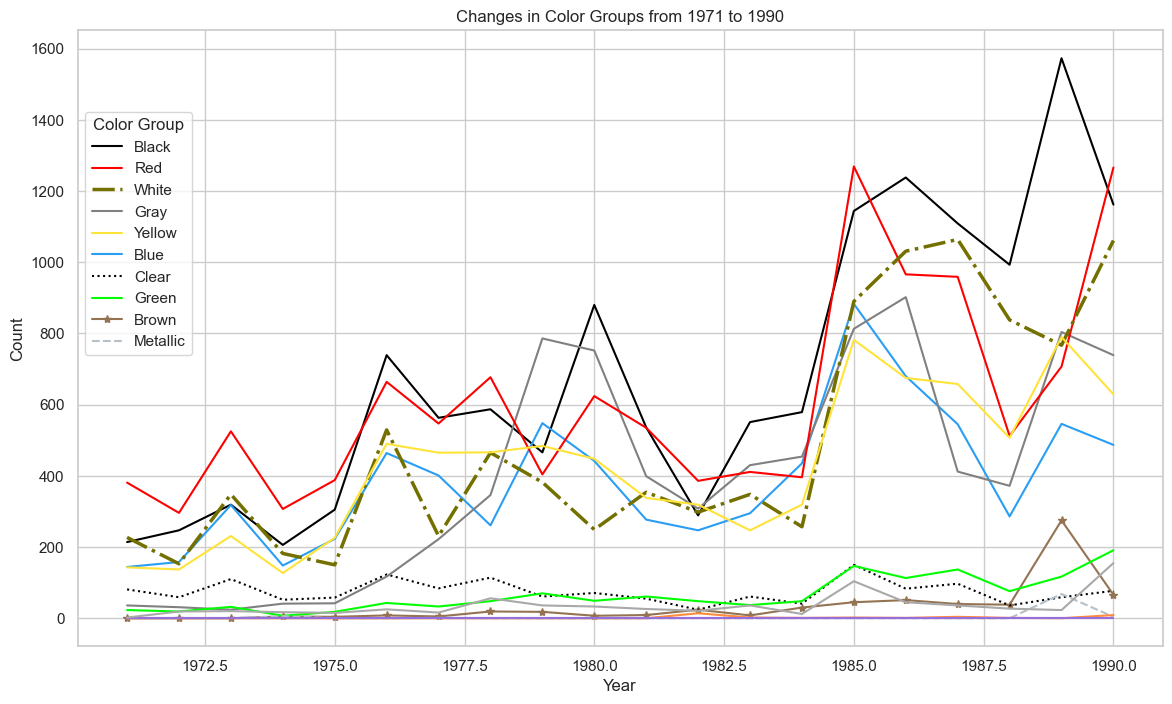

In [156]:
# Find the first appearance of glow pieces
first_appearance_glow = merged_df[merged_df['glow'] == True]['year'].min()

# Define the color mapping for the LINES
color_mapping_lines = {
    
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFE338',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#947352',
    'Gray': '#808080',
    'White': '#737000',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9',
    
}

# Define the desired order of color groups in the legend
legend_order = ['Black', 'Red', 'White', 'Gray','Yellow', 'Blue', 'Clear', 'Green', 'Brown', 'Metallic']

# Initialize the lines dictionary for the second plot
lines = {}

# Group the data by year and color group, and count the occurrences
color_group_counts = merged_df.groupby(['year', 'color_group']).size().unstack(fill_value=0)

# Filter data for the period 1971 to 1990
color_group_counts_1971_1990 = color_group_counts.loc[1971:1990]

# Plot the data for 1971 to 1990
plt.figure(figsize=(14, 8))
for color_group in color_group_counts_1971_1990.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='--')
    elif color_group == 'Unknown Wild Card':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle='-.')
    elif color_group == 'Clear':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle=':')
    elif color_group == 'White':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='-.', linewidth=2.5)
    elif color_group == 'Brown':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group), marker='*', linestyle='-')
    else:
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'))
    lines[color_group] = line



# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]


plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0, .88), loc='upper left')

plt.title('Changes in Color Groups from 1971 to 1990')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Changes in Color Groups from 1991 to 2024

### Pink, Purple, Orange

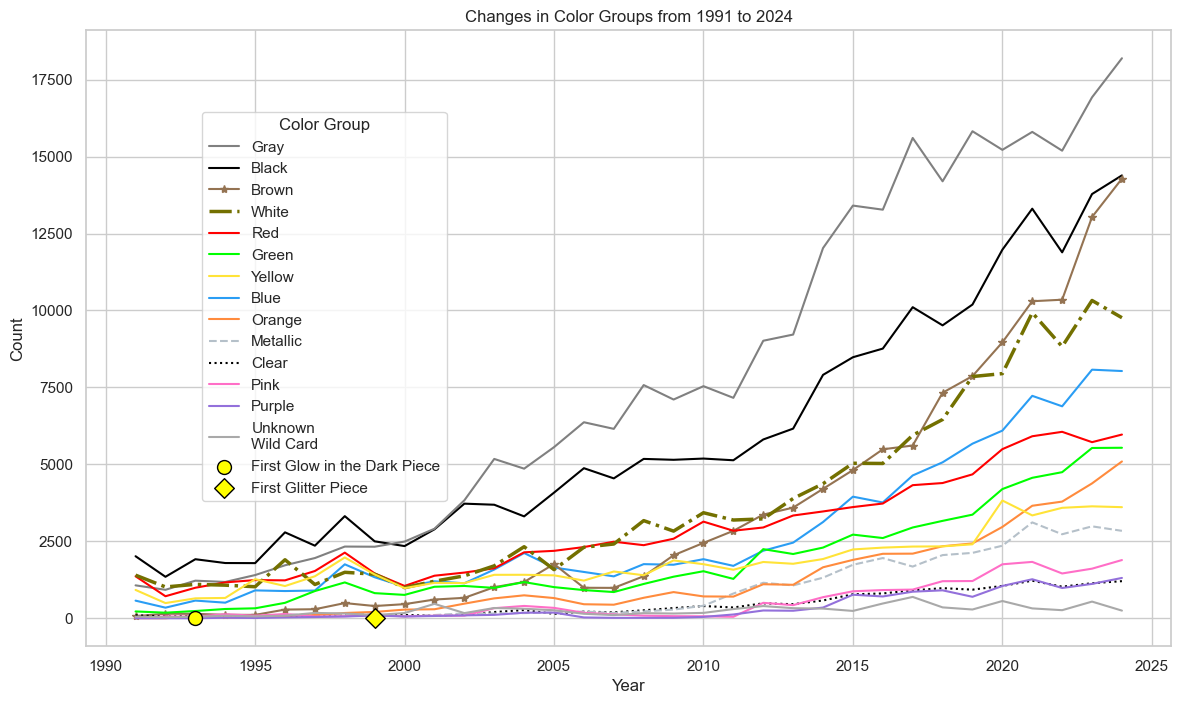

In [161]:
# Find the first year with at least 50 pieces for pink, purple, and orange
first_year_pink = merged_df[(merged_df['color_group'] == 'Pink') & (merged_df['quantity'] >= 50)]['year'].min()
first_year_purple = merged_df[(merged_df['color_group'] == 'Purple') & (merged_df['quantity'] >= 50)]['year'].min()
first_year_orange = merged_df[(merged_df['color_group'] == 'Orange') & (merged_df['quantity'] >= 50)]['year'].min()

# Define the color mapping for the LINES
color_mapping_lines = {
    
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFE338',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#947352',
    'Gray': '#808080',
    'White': '#737000',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9',
    'Glitter': '#FFFF00',  # Adding color for Glitter
    'Glow': '#FFFF00'  # Adding color for Glow
}

# Define the desired order of color groups in the legend
legend_order = ['Gray', 'Black', 'Brown', 'White', 'Red', 'Green', 'Yellow', 'Blue', 'Orange', 'Metallic', 'Clear', 'Pink', 'Purple', 'Unknown\nWild Card']

# Initialize the lines dictionary for the third plot
lines = {}

# Group the data by year and color group, and count the occurrences
color_group_counts = merged_df.groupby(['year', 'color_group']).size().unstack(fill_value=0)

# Filter data for the period 1991 to 2024
color_group_counts_1991_2024 = color_group_counts.loc[1991:2024]

# Plot the data for 1991 to 2024
plt.figure(figsize=(14, 8))
for color_group in color_group_counts_1991_2024.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts_1991_2024.index, color_group_counts_1991_2024[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='--')
    elif color_group == 'Unknown Wild Card':
        line, = plt.plot(color_group_counts_1991_2024.index, color_group_counts_1991_2024[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle='-.')
    elif color_group == 'Clear':
        line, = plt.plot(color_group_counts_1991_2024.index, color_group_counts_1991_2024[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle=':')
    elif color_group == 'White':
        line, = plt.plot(color_group_counts_1991_2024.index, color_group_counts_1991_2024[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='-.', linewidth=2.5)
    elif color_group == 'Brown':
        line, = plt.plot(color_group_counts_1991_2024.index, color_group_counts_1991_2024[color_group], label=color_group, color=color_mapping_lines.get(color_group), marker='*', linestyle='-')
    else:
        line, = plt.plot(color_group_counts_1991_2024.index, color_group_counts_1991_2024[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'))
    lines[color_group] = line

# Add a point for the first appearance of glow pieces
glow_scatter = plt.scatter(first_appearance_glow, 0, color=color_mapping_lines['Glow'], edgecolor='black', s=100, zorder=5, label='First Glow')

# Add points for the first appearance of pink, purple, glitter pieces
glitter_scatter = plt.scatter(first_appearance_glitter, 0, color=color_mapping_lines['Glitter'], edgecolor='black', s=100, zorder=5, label='First Glitter Piece Introduced', marker="D")

# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]

# Add the scatter point to the legend
handles.append(glow_scatter)
labels.append('First Glow in the Dark Piece')
handles.append(glitter_scatter)
labels.append('First Glitter Piece')

plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0.1, .88), loc='upper left')

plt.title('Changes in Color Groups from 1991 to 2024')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

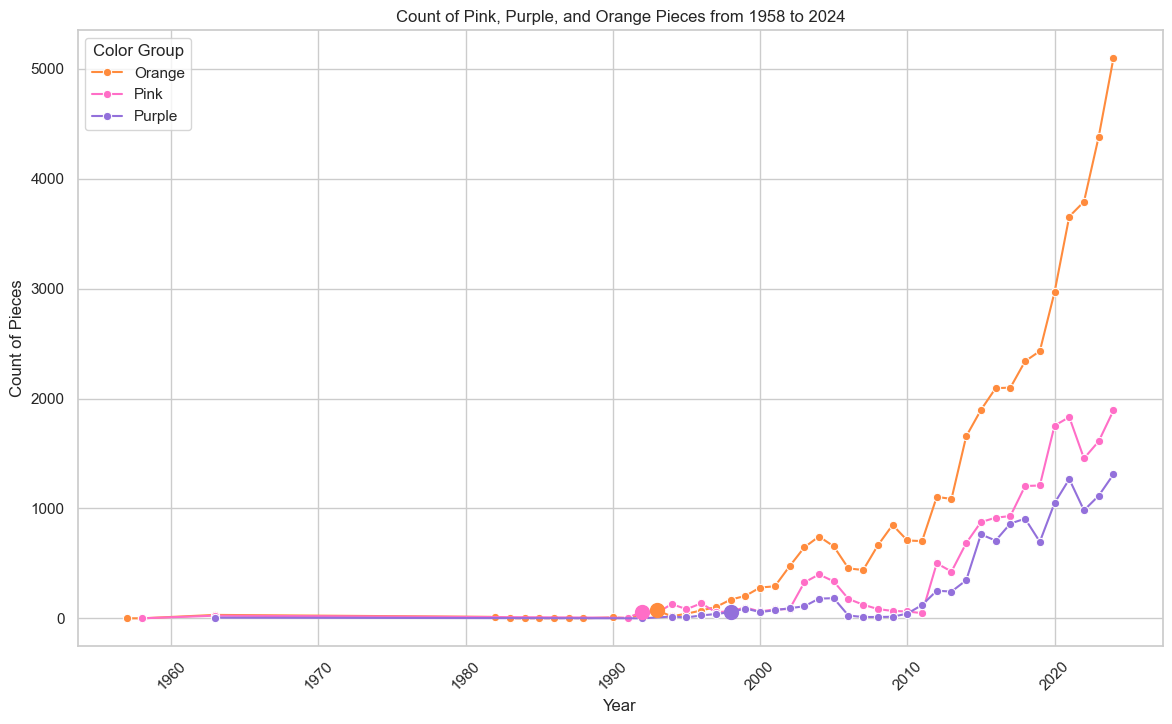

In [150]:
# Define the color mapping
color_mapping = {
    'Pink': '#FF6EC7',
    'Purple': '#9370DB',
    'Orange': '#FF8B3D'
}

# Filter the data for the specified colors
filtered_df = merged_df[merged_df['color_group'].isin(['Pink', 'Purple', 'Orange'])]

# Group by year and color_group, and count the occurrences
grouped_df = filtered_df.groupby(['year', 'color_group']).size().reset_index(name='count')

# Initialize a list to store the first year with at least 50 pieces for each color
first_years = []

# Iterate through each color group
for color in ['Pink', 'Purple', 'Orange']:
    # Filter the grouped data for the current color
    color_df = grouped_df[grouped_df['color_group'] == color]
    
    # Find the first year with at least 50 pieces
    first_year = color_df[color_df['count'] >= 50].iloc[0] if not color_df[color_df['count'] >= 50].empty else None
    
    # Append the result to the list
    first_years.append(first_year)

# Convert the list to a DataFrame
first_years_df = pd.DataFrame(first_years)

# Create the line chart using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_df, x='year', y='count', hue='color_group', palette=color_mapping, marker='o')

# Add points for the first year with at least 50 pieces
for _, row in first_years_df.iterrows():
    plt.scatter(row['year'], row['count'], color=color_mapping[row['color_group']], s=100, zorder=5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Pieces')
plt.title('Count of Pink, Purple, and Orange Pieces from 1958 to 2024')
plt.legend(title='Color Group')
plt.xticks(rotation=45)

# Show the line chart
plt.show()

## Changes in the average number of pieces in LEGO sets over time

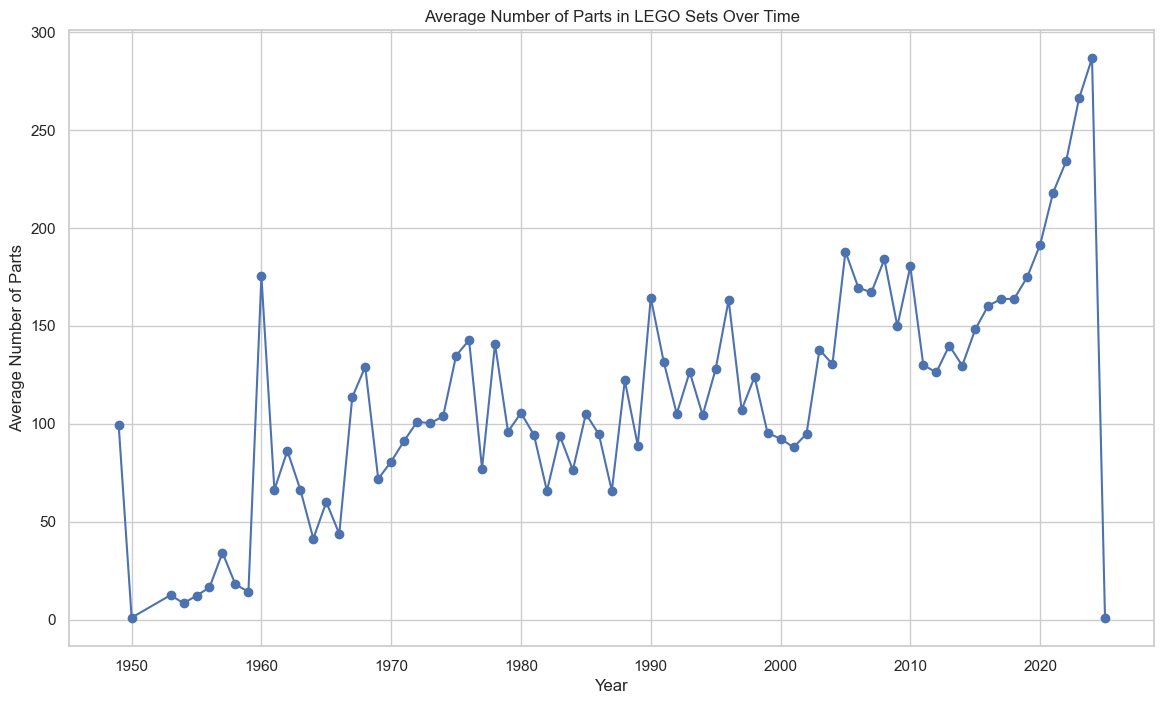

In [216]:
# Group the data by year and calculate the average number of parts per set
average_num_parts_per_year = sets.groupby('year')['num_parts'].mean()

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(average_num_parts_per_year.index, average_num_parts_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Number of Parts in LEGO Sets Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.grid(True)
plt.show()